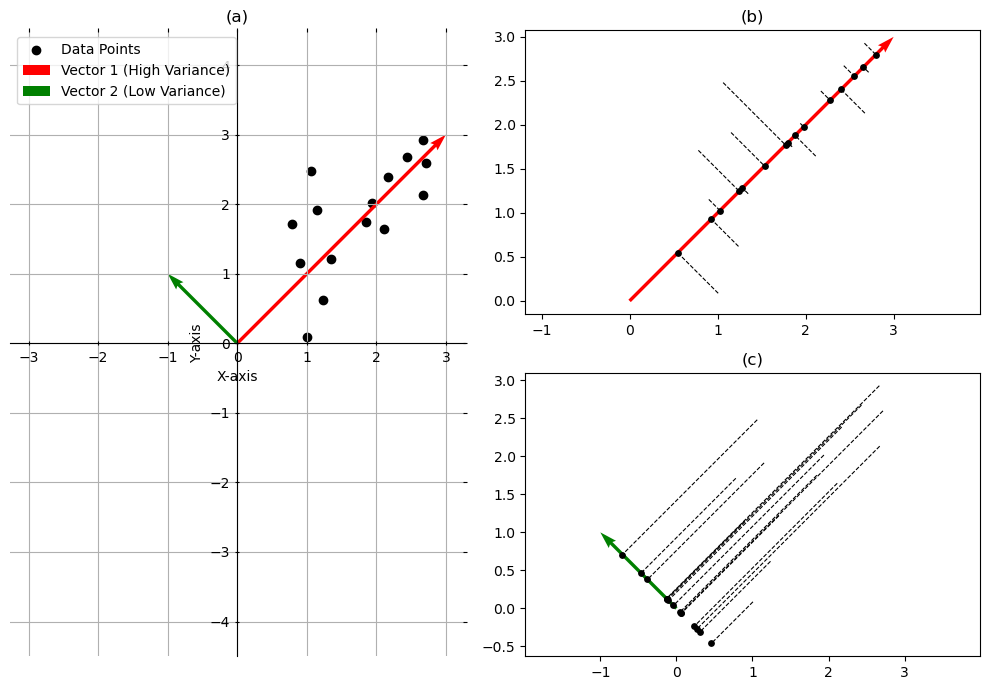

In [1]:
#created qith chatgbt
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate sample data with correlation in a 2D space (approximate ellipse in the ++ quadrant)
mean = [2.7, 2.7]
cov = [[1, 0.8], [0.8, 1]]  # covariance matrix to create correlation
data = np.random.multivariate_normal(mean, cov, 20)

data = data[(data[:, 0] >= -3) & (data[:, 0] <= 3) & (data[:, 1] >= -3) & (data[:, 1] <= 3)]

# Adjust vectors to start from the origin and extend their length for better visibility
vector1 = np.array([3, 3])  # lengthened vector1 to span height of 4
vector2 = np.array([-1, 1]) # lengthened vector2 to span height of 2 (can go into negative parts)

# Recalculate projections with updated vectors
proj1 = np.outer(data @ vector1 / np.linalg.norm(vector1)**2, vector1)  # Projection onto vector1
proj2 = np.outer(data @ vector2 / np.linalg.norm(vector2)**2, vector2)  # Projection onto vector2

# Create the main plot and subplots
fig = plt.figure(figsize=(10, 7))
main_ax = fig.add_subplot(1, 2, 1)
proj1_ax = fig.add_subplot(2, 2, 2)
proj2_ax = fig.add_subplot(2, 2, 4)

# Main plot with data and vectors
main_ax.scatter(data[:, 0], data[:, 1], color='black', label='Data Points')
main_ax.quiver(0, 0, *vector1, scale=1, color='red', angles='xy', scale_units='xy', label='Vector 1 (High Variance)')
main_ax.quiver(0, 0, *vector2, scale=1, color='green', angles='xy', scale_units='xy', label='Vector 2 (Low Variance)')

# Setting title and labels
#main_ax.set_title("2D Data with Sample Vectors")
main_ax.set_xlabel("X-axis")
main_ax.set_ylabel("Y-axis")
#main_ax.legend()

# Add grid and set equal scaling
main_ax.grid(True)
main_ax.axis("equal")

# Set axis limits to show equal quadrants around origin
main_ax.set_xlim(-5, 5)
main_ax.set_ylim(-5, 5)

# Set ticks for both axes to go by 1s
main_ax.set_xticks(range(-5, 6, 1))  # x-axis ticks from -5 to 5, step by 1
main_ax.set_yticks(range(-5, 6, 1))  # y-axis ticks from -5 to 5, step by 1

# Move spines to the origin
main_ax.spines['left'].set_position('zero')   # y-axis at x=0
main_ax.spines['bottom'].set_position('zero') # x-axis at y=0
main_ax.spines['right'].set_color('none')     # Remove right spine
main_ax.spines['top'].set_color('none')       # Remove top spine

# Show ticks on both sides of axes
main_ax.xaxis.set_tick_params(bottom=True, top=True, direction='inout')
main_ax.yaxis.set_tick_params(left=True, right=True, direction='inout')

main_ax.legend(loc=2)
main_ax.set_title("(a)")

# Projections on Vector 1
proj1_ax.quiver(0, 0, *vector1, scale=1, color='red', angles='xy', scale_units='xy', label='Vector 1')
proj1_ax.scatter(proj1[:, 0], proj1[:, 1],s=15, color='black', label='Projections on Vector 1')
for point, proj in zip(data, proj1):
    proj1_ax.plot([point[0], proj[0]], [point[1], proj[1]], 'k--', lw=0.8)  # Projection lines
# Add vector 1 itself to proj1_ax
proj1_ax.set_title("(b)")
proj1_ax.axis("equal")

# Projections on Vector 2
proj2_ax.quiver(0, 0, *vector2, scale=1, color='green', angles='xy', scale_units='xy', label='Vector 2')
proj2_ax.scatter(proj2[:, 0], proj2[:, 1],s=15, color='black', label='Projections on Vector 2')
for point, proj in zip(data, proj2):
    proj2_ax.plot([point[0], proj[0]], [point[1], proj[1]], 'k--', lw=0.8)  # Projection lines
# Add vector 2 itself to proj2_ax
proj2_ax.set_title("(c)")
proj2_ax.axis("equal")

plt.tight_layout()

plt.savefig("proj-diagram.svg")

plt.show()
